In [1]:
import numpy as np
import pandas as pd

#### 各欄位名稱的意義
CRIM : per capita crime rate by town\
ZN : proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS : proportion of non-retail business acres per town.\
CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX : nitric oxides concentration (parts per 10 million)\
RM : average number of rooms per dwelling\
AGE : proportion of owner-occupied units built prior to 1940\
DIS : weighted distances to five Boston employment centres\
RAD : index of accessibility to radial highways\
TAX : full-value property-tax rate per \\$10,000\
PTRATIO : pupil-teacher ratio by town\
B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT : \% lower status of the population\
MEDV : Median value of owner-occupied homes in \\$1000's

In [11]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=names)

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### 檢查是否有空值

In [110]:
# True: 有空值  False: 無空值
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

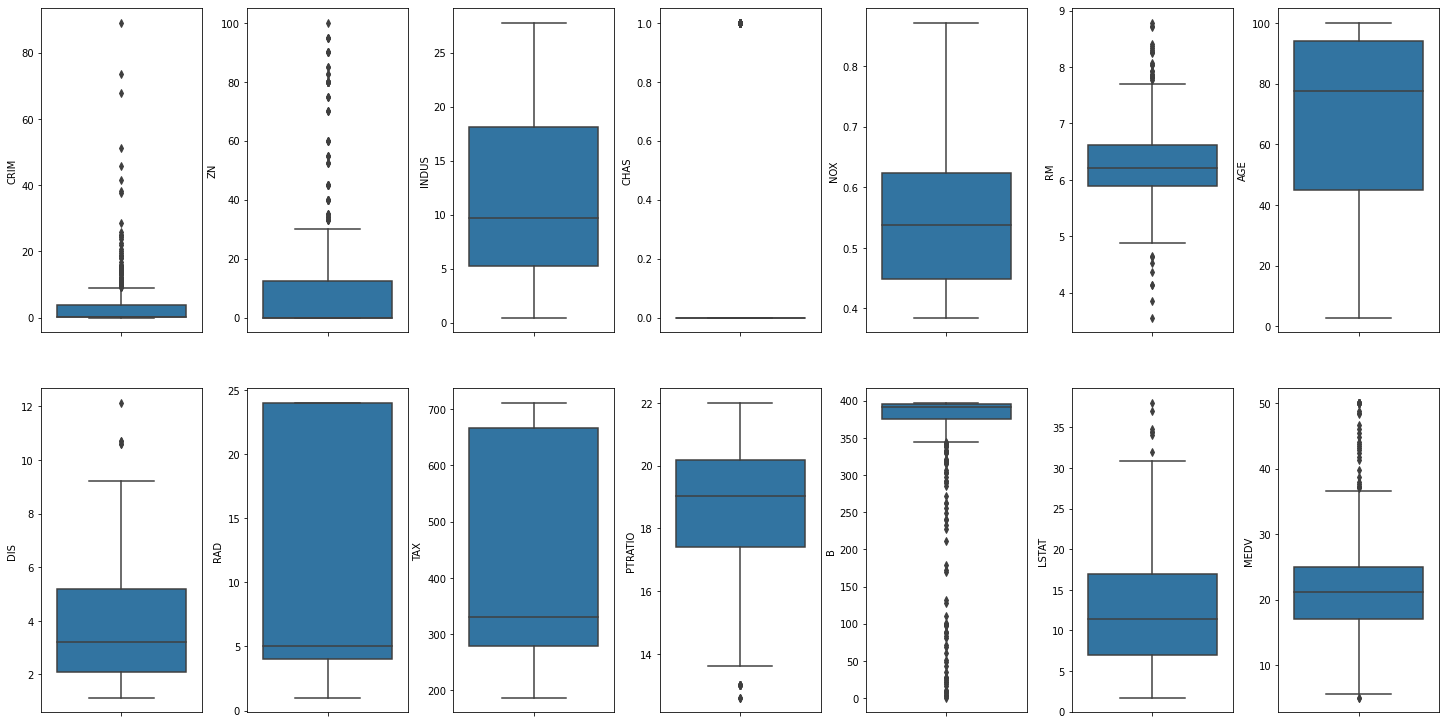

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

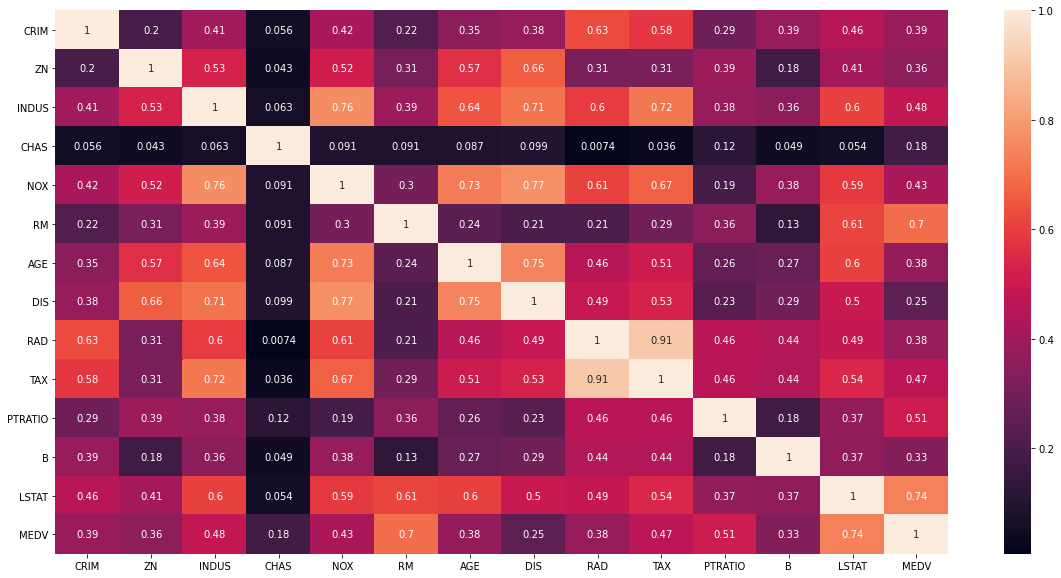

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

從上圖能看到與MEDV相關性較高(r>0.4)的欄位有:INDUS, NOX, RM, TAX, PTRATIO, LSTAT\
因此先選擇上述的欄位進行迴歸分析

In [24]:
from sklearn import preprocessing
# 將數值調整至0~1之間: MinMaxScaler
# 將數值normalize(減去平均再除以標準差): StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
# 或將數值normalize(減去平均再除以標準差): StandardScaler
# normal_scaler = preprocessing.StandardScaler()

column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [89]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# 建立x, y
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']
x = df.loc[:,column_sels]
y = df['MEDV']

# linear regrssion without regularization (可能容易overfitting)
l_regression = linear_model.LinearRegression()
# 進行 k-fold cross validation
# 將資料分成5群，每次以4群來train model，剩下一群來validate
kf = KFold(n_splits=5)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='r2')
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")
scores_map = {}
scores_map['LinearRegression'] = scores

# linear regrssion with L2 regularization
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='r2')
scores_map['Ridge'] = scores
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.37 (+/-0.34)
R square: 0.41 (+/-0.28)


In [ ]:
# 尋找可使用在cross_val_score的指標(ex.mse r^2 accuracy)
# from sklearn import metrics
# sorted(metrics.SCORERS.keys())

In [88]:
x_scaled.shape

(466, 6)

In [90]:
# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# 嘗試利用多元迴歸看是否能改善模型(次方為2~5)
for degree in range(2, 6):
    # make_pipeline可以將步驟串連在一起
    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='r2')
    print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.60 (+/-0.25)
R square: 0.53 (+/-0.39)
R square: 0.38 (+/-0.68)
R square: 0.26 (+/-0.92)


結果都不是很好，進行交叉驗證時發現標準差過大，代表模型不穩固，因此試著將離群值(outliers)刪掉

In [95]:
# 移除MEDV中的離群值
q1 = df['MEDV'].quantile(0.25)
q3 = df['MEDV'].quantile(0.75)
irq = q3 - q1
df_remove_outlier = df.loc[(df['MEDV'] <= q3 + 1.5 * irq) & (df['MEDV'] >= q1 - 1.5 * irq)]

In [96]:
# 離群值移除後，從原本506筆資料降成466筆
df_remove_outlier.shape

(466, 14)

將移除離群值的資料來訓練模型

In [97]:
# 將x,y改成移除離儲值的資料
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']
x = df_remove_outlier.loc[:,column_sels]
y = df_remove_outlier['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# linear regrssion without regularization (可能容易overfitting)
l_regression = linear_model.LinearRegression()
# 進行 k-fold cross validation
# 將資料分成5群，每次以4群來train model，剩下一群來validate
kf = KFold(n_splits=5)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='r2')
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")
scores_map = {}
scores_map['LinearRegression'] = scores

# linear regrssion with L2 regularization
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='r2')
scores_map['Ridge'] = scores
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.45 (+/-0.18)
R square: 0.48 (+/-0.15)


In [85]:
# 嘗試利用多元迴歸看是否能改善模型(次方為2~5)
for degree in range(2, 6):
    # make_pipeline可以將步驟串連在一起
    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='r2')
    print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.57 (+/-0.11)
R square: 0.59 (+/-0.07)
R square: 0.55 (+/-0.08)
R square: 0.49 (+/-0.15)


根據上述結果能看到，當多元回歸的次方設定為3時，有最大的R square

In [99]:
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='r2')
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.59 (+/-0.07)


從各項線性模型的結果能看到，將離群值移除，交叉驗證後r square的平均上升且標準差小，代表模型有改善\
接著使用non-parametric的方法

#### Support Vector Regression

In [100]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 利用網格搜索(grid search)尋找最合適的參數設定
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : SVR(C=1000.0, gamma=0.1)


In [98]:
# 最佳參數的交叉驗證結果
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='r2')
scores_map['SVR'] = scores
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.62 (+/-0.04)


#### Decision Tree Regression

In [102]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor()
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : DecisionTreeRegressor(max_depth=4)


In [105]:
desc_tr = DecisionTreeRegressor(max_depth=4)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='r2')
scores_map['DecisionTreeRegressor'] = scores
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.52 (+/-0.11)


#### Gradient Boosting for regression
Decision Tree Regression + Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9)


In [107]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='r2')
scores_map['GradientBoostingRegressor'] = scores
print(f"R square: {scores.mean():.2f} (+/-{scores.std():.2f})")

R square: 0.66 (+/-0.09)


<AxesSubplot:>

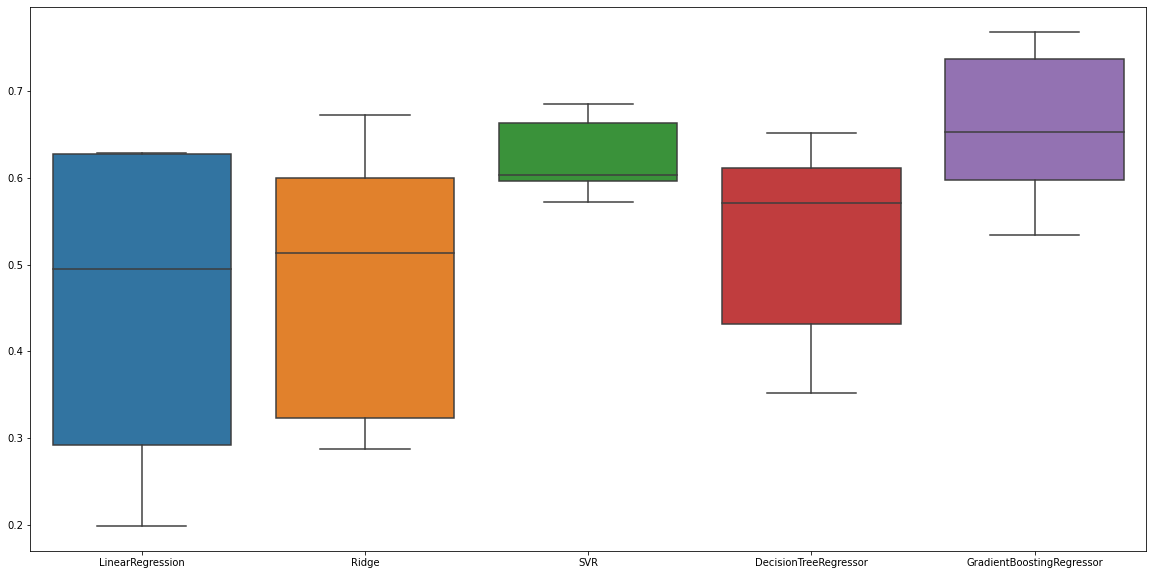

In [108]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

從上圖能看出，SVR和GradientBoostingRegressor有較好的表現